<a href="https://colab.research.google.com/github/josefa-santana/topicosEspeciaisII/blob/main/arvoreDecisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
planetas=sns.load_dataset('planets')

In [3]:
planetas.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [6]:
planetas.isna().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [11]:
planetas = planetas.dropna()

In [12]:
planetas.isna().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

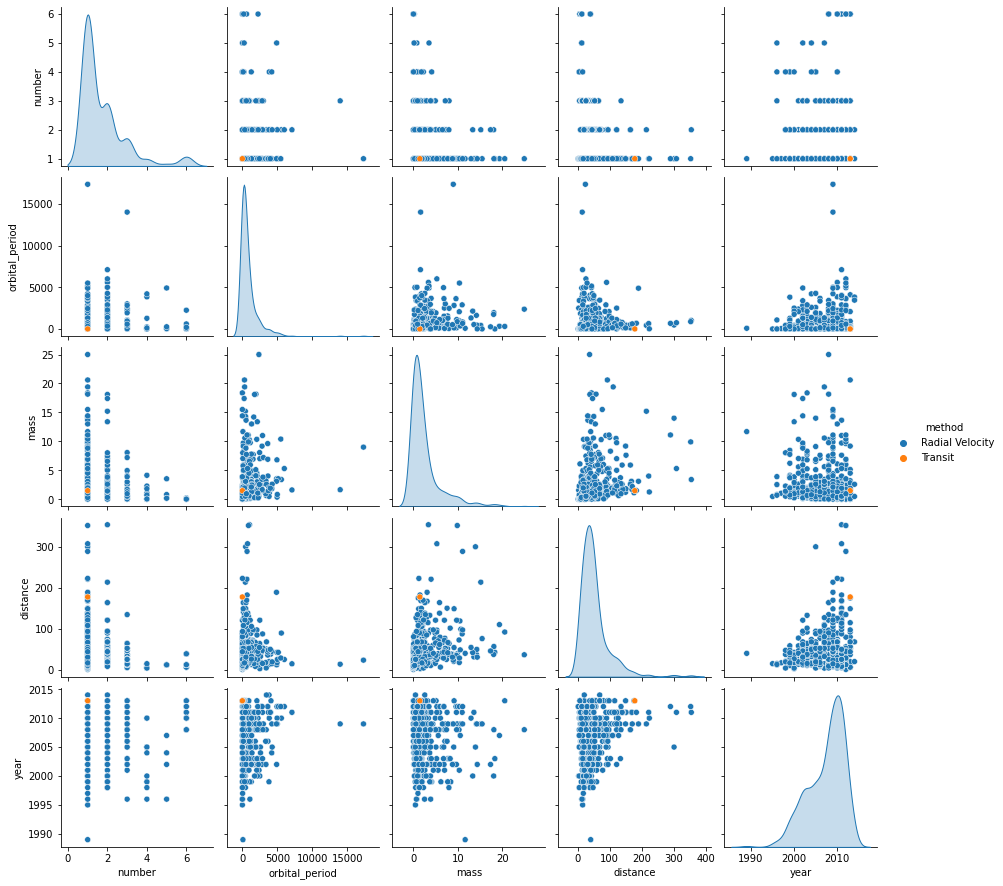

In [18]:
sns.pairplot(planetas,hue='method')

In [19]:
from sklearn.model_selection import train_test_split

In [49]:
X = planetas[['number',	'orbital_period',	'mass',	'distance',	'year']]

In [50]:
y = planetas[['method']]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
modeloArvore=DecisionTreeClassifier()

In [54]:
modeloArvore.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [56]:
features = list(planetas.columns[1:])
features

['number', 'orbital_period', 'mass', 'distance', 'year']

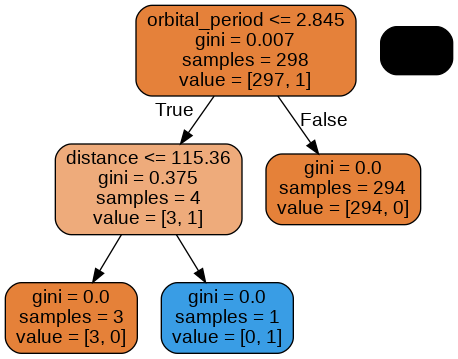

In [57]:
dot_data = StringIO()
export_graphviz(modeloArvore,
out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [58]:
predictions = modeloArvore.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

Radial Velocity       1.00      1.00      1.00       200

       accuracy                           1.00       200
      macro avg       1.00      1.00      1.00       200
   weighted avg       1.00      1.00      1.00       200



In [61]:
print(confusion_matrix(y_test, predictions))

[[200]]


Floresta Aleatória



In [62]:
from sklearn.ensemble import RandomForestClassifier
florestaAleatoria = RandomForestClassifier(n_estimators=200)
florestaAleatoria.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(n_estimators=200)

In [63]:
predicao=florestaAleatoria.predict(X_test)

In [64]:
print(confusion_matrix(y_test, predictions))

[[200]]


In [65]:
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

Radial Velocity       1.00      1.00      1.00       200

       accuracy                           1.00       200
      macro avg       1.00      1.00      1.00       200
   weighted avg       1.00      1.00      1.00       200

